<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/09_CONVOLUTION_VISUALIZATION_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Partially connected or convolutional networks 
# WE are not building a CNN from scratch today, but rather going to take a pre-trained model

# CHALLENGE-> WORLD IS INFINITE
# NOBODY CAN GATHER ALL THE DATA THE WORLD 
# SOMETIMES, we have ambitions but not enough data to train a model
# sometimes, we have enough data, but no time to train the model!
# CREATING a model from scratch becomes a WASTE of time and money

# TRANSFER_LEARNING: ability to transfer a model after it has learnt
# what can i transfer?
# 1) ENTIRE MODEL -> MODEL.SAVE -> export the entire model as h5 FILE 
# 2) ONLY THE MODEL SHAPE -> PICKLE -> write model shape into a file and export
# 3) ONLY THE MODEL PARAMS -> PICKLE -> write model weights into a file and export
# SMART WATCH -capable of AI- you could never train an AI model directly on the watch
# so you trained your AI elsewhere, and transfered the learning of (English assistant for example) model 
# to the smaller device!


Using TensorFlow backend.






553467904/553467096 [==============================] - 12s 0us/step








No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


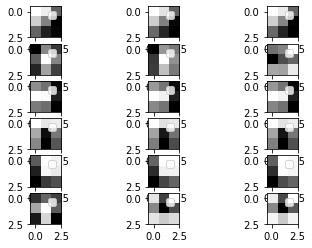

In [1]:
from keras.applications.vgg16 import VGG16 # Later -> we will implement this from scratch
# IMAGE and OBJECT detection 
# popular transfer learning algos: VGG16, ResNET, AlexNet... many many open transferable models available 
import matplotlib.pyplot as plt

model = VGG16()
#model.summary()

filters, biases = model.layers[1].get_weights()
# MIN-MAX normalization -> 0 to 1 scale
# X-Min/Max-Min
#NORMALIZE filters, biases so that they are in same scale and represented between 0 and 1
f_min, f_max = filters.min(), filters.max()
filters_norm = (filters-f_min)/(f_max-f_min)
n_filters, ix = 6, 1 # some variables that i need later (hyperparams)

for i in range(n_filters):
  f = filters[:,:,:,i]
  for j in range(3): # once for each dimension of image R,G,B
    ax = plt.subplot(n_filters, 3, ix)
    plt.imshow(f[:,:,j], cmap='gray')
    plt.legend()
    ix = ix + 1

plt.show()
# ANY IMAGE PIXEL gets matmul with FILTER
# each filter is a window of weights 
# [[p1,p2],[p3,p4]] X [[c1,c2],[c3,c4]]
# c -> convolution filter 


In [7]:
# to see convolutions, let's filter out all Convolutional layers
# Dense -> FULLY CONNECTED, CONVOLUTIONS-> NOT FULLY CONNECTED
# have weights
# CONVOLUTIONS ARE CHEAPER THAN DENSE, but many many sequences of convolutions are required for learning 
# weights are called FILTERS 
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer.name)
  print(len(filters[0][0]))


block1_conv1
3
block1_conv2
64
block2_conv1
64
block2_conv2
128
block3_conv1
128
block3_conv2
256
block3_conv3
256
block4_conv1
256
block4_conv2
512
block4_conv3
512
block5_conv1
512
block5_conv2
512
block5_conv3
512


In [0]:
model.summary()
# TRANSFER LEARNING 
# THESE ALGOS ARE MEANT FOR PRODUCTION -> GENERAL PURPOSE
# SPECIALIZED PURPOSES, these algoriths are chopped, and custom models are built on top of them 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
!ls

meseeks.jpg  sample_data


In [0]:
# early lunch -> 12:30-1:40, 3-3:45 break 
# TRANSFER learning 
# parameters + shape, or just part of shape or just parameters
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output) # CHOPPED the previous VGG model and
# utilized only input and till the next layer's output
# PARTIAL SHAPE [beginning of VGG model was transferred to my model]


In [0]:
model.summary() # EXTRACTED FEATURES FROM ANOTHER MODEL AND USE THEM IN MINE 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img = load_img('meseeks.jpg', target_size=(224,224)) # because it preserves the dimensions
# from image, convert to array of numbers to feed to NN
img = img_to_array(img) # this results in a a 2-D matrix array
img.shape

(224, 224, 3)

In [0]:
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input 
img = expand_dims(img, axis=0) # CREATES or REMOVES new dimensions into your data 
# previously img was (Width, Height, Depth)
# 1 more dimension to it-> SAMPLE_ID
# (SAMPLE_ID, W, H, D)
img = preprocess_input(img)
# prepares img to be used by VGG16
featureMaps = model.predict(img) 

In [0]:
# VGG16 -> 64 maps
featureMaps.shape
# DATA (224,244,3) X FILTERS = featureMap (224,224,64)
# Inputs X weights = Data
# Image pixels and frames X filters = FeatureMap

(1, 224, 224, 64)

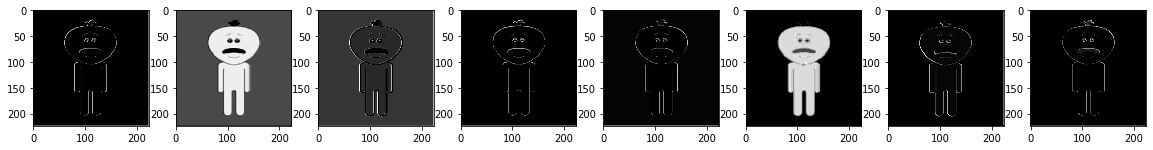

In [0]:
#let's plot our feature maps
sz = 8 # 64 filters, displaying on 8X8 grid 
index = 1
plt.figure(figsize=(20,20))
for x in range(sz):
  ax = plt.subplot(sz,sz, index)
  plt.imshow(featureMaps[0,:,:,index-1], cmap='gray')
  index= index+1
plt.show()
# Take a 5 min break-> 11:50 reassemble plz 
# 224X224 image -> 64 different kernels to it -> sending it out 

In [0]:
# YOUR TESTS will be on the same portal-> camera is required, cannot be open book -> NO SYNTAX question 
# TEST LINK-> connect with your teammates on same day and collect the test link
# Last Sat -> till Friday, MCQ 1 option correct

In [0]:
1:55 -> Reassemble post lunch 